# Аналитик данных. Тестовое задание.

## Общая информация

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('C:/Users/79283/Desktop/Analytic_test.xlsx', header=1)
data.head()

,Unnamed: 0,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В файле содержатся данные, в упорядоченном формате, о 4 компаниях: Red, Green, Blue, Black.<br>
По компаниям представлены следующие данные:
* HID - human_id, зашифрованный персональный идентификатор пользователя компаний
* has_company_id - наличие зарегистрированного аккаунта в компании
* company_gmv_total - суммарный gmv пользователя в сервисе
* company_gmv_order_count - количество успешных заказов пользователя в сервисе
* company_activity_count - количество активных действий пользователя в сервисе
* company_android - установленное у пользователя приложение компании на платформе android
* company_apple - установленное у пользователя приложение компании на платформе apple
* company_web - установленное у пользователя приложение компании на ПК
* is_msk - территориальное расположение в Москве

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100000 non-null  int64  
 1   HID                    100000 non-null  object 
 2   active_Red             100000 non-null  float64
 3   has_Green_id           100000 non-null  float64
 4   has_Black_id           100000 non-null  float64
 5   has_Blue_id            100000 non-null  float64
 6   Blue_activity_count    100000 non-null  object 
 7   Blue_gmv_total         99999 non-null   float64
 8   Green_gvm_total        100000 non-null  float64
 9   Green_gvm_order_count  100000 non-null  object 
 10  Black_gvm_total        100000 non-null  float64
 11  Black_gvm_order_count  100000 non-null  object 
 12  Red_android            100000 non-null  float64
 13  Green_android          100000 non-null  float64
 14  Black_android          100000 non-nul

В данных присутствуют не все данные, отсутствуют следующие столбцы:
* has_red_id
* red_gmv_total
* red_gmv_order_count
* blue_gmv_order_count
* red_activity_count
* green_activity_count
* black_activity_count

В идеале должно было быть 30 столбцов. Более того у нас есть неизвестный столбец *active_red*. Предстоит разобраться, что он означает.

**Задача.** Провести анализ и сформулировать выводы на основании данных.

## Предобработка данных

### Наименования столбцов

На основании данных, мы предполагаем, что перед нами данные о пользователях и их отношении к разным компаниям, сервисами которых они пользуются. 

В таблице есть ошибки в названиях столбцов, поэтому мы их подправим:

In [4]:
data.columns

Index(['Unnamed: 0', 'HID', 'active_Red', 'has_Green_id', 'has_Black_id',
       'has_Blue_id', 'Blue_activity_count', 'Blue_gmv_total',
       'Green_gvm_total', 'Green_gvm_order_count', 'Black_gvm_total',
       'Black_gvm_order_count', 'Red_android', 'Green_android',
       'Black_android', 'Blue_android', 'Red_apple', 'Green_apple',
       'Black_apple', 'Blue_apple', 'is_msk', 'Red_web', 'Green_web',
       'Black_web', 'Blue_web'],
      dtype='object')

In [5]:
data.columns = ['Unnamed: 0', 'hid', 'active_red', 'has_green_id', 'has_black_id',
       'has_blue_id', 'blue_activity_count', 'blue_gmv_total',
       'green_gmv_total', 'green_gmv_order_count', 'black_gmv_total',
       'black_gmv_order_count', 'red_android', 'green_android',
       'black_android', 'blue_android', 'red_apple', 'green_apple',
       'black_apple', 'blue_apple', 'is_msk', 'red_web', 'green_web',
       'black_web', 'blue_web']

Так же удалим первый столбец, так как он просто указывает на номер строки:

In [6]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,hid,active_red,has_green_id,has_black_id,has_blue_id,blue_activity_count,blue_gmv_total,green_gmv_total,green_gmv_order_count,black_gmv_total,...,blue_android,red_apple,green_apple,black_apple,blue_apple,is_msk,red_web,green_web,black_web,blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Тип столбцов и пропуски

На этапе знакомства с данными, методом `info()`, мы обнаружили, что некоторые столбцы имеют строковый тип данных. Изменим их на целочисленный.

In [7]:
# data['blue_activity_count'] = pd.to_numeric(data['blue_activity_count'],
#                                             downcast='integer')

# data['green_gmv_order_count'] = pd.to_numeric(data['green_gmv_order_count'],
#                                               downcast='integer')

# data['black_gmv_order_count'] =pd.to_numeric(data['black_gmv_order_count'],
#                                              downcast='integer')

# data.info()

Код выше вывел ошибку. В столбцах содержатся значения, которые не переводятся в int32, посмотрим на уникальные значения этих столбцов и исправим вручную.

In [8]:
print('BLUE_ACTIVITY_COUNT\n', data['blue_activity_count'].unique(), '\n')
print('GREEN_GMV_ORDER_COUNT\n', data['green_gmv_order_count'].unique(), '\n')
print('BLACK_GMV_ORDER_COUNT\n', data['black_gmv_order_count'].unique(), '\n')

BLUE_ACTIVITY_COUNT
 ['2.0' '0.0' '1.0' '17.0' '13.0' '5.0' '6.0' '26.0' '8.0' '4.0' '27.0'
 '19.0' '12.0' '9.0' '3.0' '20.0' '10.0' '23.0' '7.0' '16.0' '14.0' '15.0'
 '53.0' datetime.datetime(2019, 5, 4, 0, 0) '32.0' '11.0' '18.0' '24.0'
 '119.0' '49.0' '39.0' '21.0' datetime.datetime(2019, 5, 7, 0, 0) '35.0'
 '72.0' '30.0' '71.0' '28.0' '42.0' '34.0' '41.0' '22.0' '29.0' '36.0'
 '90.0' '40.0' '43.0' datetime.datetime(2019, 5, 1, 0, 0) '51.0' '44.0'
 '25.0' '31.0' '45.0' '67.0' '33.0' '101.0' '74.0' '46.0' '111.0' '66.0'
 '38.0' '63.0' '100.0' '237.0' '59.0' datetime.datetime(2019, 5, 3, 0, 0)
 datetime.datetime(2019, 5, 6, 0, 0) '37.0' '47.0'] 

GREEN_GMV_ORDER_COUNT
 ['0.0' '2.0' '26.0' '5.0' '37.0' '3.0' '12.0' '7.0' '1.0' '6.0' '8.0'
 datetime.datetime(2019, 5, 4, 0, 0) '4.0' '40.0' '9.0' '22.0' '14.0'
 '15.0' '85.0' '25.0' '10.0' '20.0' '18.0' '11.0' '31.0' '23.0' '39.0'
 '13.0' '42.0' '127.0' '28.0' '101.0' '32.0' '30.0' '27.0' '51.0' '83.0'
 '36.0' '16.0' '64.0' '19.0' '29.0' '

В численных столбцах почему-то содержатся даты. Эти значения необходимо удалить, для этого мы сперва заменим их на *NaN*, а затем удалим.

In [9]:
data['blue_activity_count'] = pd.to_numeric(data['blue_activity_count'],
                                            downcast='integer', errors='coerce')

data['green_gmv_order_count'] = pd.to_numeric(data['green_gmv_order_count'],
                                              downcast='integer', errors='coerce')

data['black_gmv_order_count'] =pd.to_numeric(data['black_gmv_order_count'],
                                             downcast='integer', errors='coerce')

Удалим строки, в которых есть пропуски, и обновим индексы строк.

In [10]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99986 entries, 0 to 99985
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hid                    99986 non-null  object 
 1   active_red             99986 non-null  float64
 2   has_green_id           99986 non-null  float64
 3   has_black_id           99986 non-null  float64
 4   has_blue_id            99986 non-null  float64
 5   blue_activity_count    99986 non-null  float64
 6   blue_gmv_total         99986 non-null  float64
 7   green_gmv_total        99986 non-null  float64
 8   green_gmv_order_count  99986 non-null  float64
 9   black_gmv_total        99986 non-null  float64
 10  black_gmv_order_count  99986 non-null  float64
 11  red_android            99986 non-null  float64
 12  green_android          99986 non-null  float64
 13  black_android          99986 non-null  float64
 14  blue_android           99986 non-null  float64
 15  re

### Столбец active_red

Этот столбец может принадлежать к одному из 4 типов столбцов, для начала посмотрим на значения, которые он хранит:

In [11]:
data['active_red'].value_counts()

1.0    55864
0.0    44122
Name: active_red, dtype: int64

Вероятно, он принадлежит булевому типу, но сравним с некоторыми остальными столбцами, которые по идее, должны хранить в себе куда более разные значения. Определим этот столбец к тому, который будет больше похож на него.

In [12]:
def print_value_counts(*column_names):
    for name in column_names:
        print(name.upper(), '\n', data[name].sort_values().value_counts(), '\n')

In [13]:
print_value_counts('has_green_id', 'blue_activity_count', 'black_gmv_total', 'green_gmv_order_count')

HAS_GREEN_ID 
 0.0    99104
1.0      881
2.0        1
Name: has_green_id, dtype: int64 

BLUE_ACTIVITY_COUNT 
 0.0      96108
1.0       1368
2.0        625
3.0        425
4.0        288
         ...  
67.0         1
66.0         1
59.0         1
38.0         1
237.0        1
Name: blue_activity_count, Length: 64, dtype: int64 

BLACK_GMV_TOTAL 
 0.0         98910
1700.0          8
1598.0          7
1200.0          5
2460.0          5
            ...  
3812.0          1
3816.0          1
3834.0          1
3840.0          1
188252.0        1
Name: black_gmv_total, Length: 910, dtype: int64 

GREEN_GMV_ORDER_COUNT 
 0.0      99104
1.0        237
2.0        124
4.0         81
3.0         70
         ...  
52.0         1
56.0         1
60.0         1
62.0         1
168.0        1
Name: green_gmv_order_count, Length: 69, dtype: int64 



Вероятно, столбец *active_red* - это наш отсутствующий столбец *has_red_id*. Однако мы нашли еще одно несоответствие: столбец *has_green_id* имеет в себе значение 2. С этим мы разберемся на следующем шаге, а сейчас определим *active_red* как *has_red_id*.

In [14]:
data = data.rename(columns={'active_red': 'has_red_id'})

### Уникальные значения и соответствие столбцов

Как мы уже выяснили, в данных очень много ошибок, которые предстоит убрать. На этом шаге мы разделим все столбцы на группы, выведем их уникальные значения. Мы должны убедиться в том, что названия столбцов соответствуют их содержанию, а также содержание соответствует реальности (в булевом столбце не может быть 3 разных значения).

#### has_company_id

Столбец должен иметь в себе значения 0 и 1.

In [15]:
print_value_counts('has_red_id', 'has_green_id', 'has_blue_id', 'has_black_id')

HAS_RED_ID 
 1.0    55864
0.0    44122
Name: has_red_id, dtype: int64 

HAS_GREEN_ID 
 0.0    99104
1.0      881
2.0        1
Name: has_green_id, dtype: int64 

HAS_BLUE_ID 
 0.0    86732
1.0    12746
2.0      495
3.0       12
4.0        1
Name: has_blue_id, dtype: int64 

HAS_BLACK_ID 
 0.0    98910
1.0     1074
2.0        2
Name: has_black_id, dtype: int64 



* has_green_id имеет выброс в значении 2
* has_black_id имеет выбросы в значении 2
* has_blue_id имеет множество выбросов

In [16]:
data = data[(data['has_green_id'] < 2) &
           (data['has_blue_id'] < 2) &
           (data['has_black_id'] < 2)]

#### company_gmv_total

In [17]:
print_value_counts('green_gmv_total', 'blue_gmv_total', 'black_gmv_total')

GREEN_GMV_TOTAL 
 0.0        98601
500.0         29
400.0         28
900.0         14
1000.0        13
           ...  
2908.0         1
2914.0         1
2924.0         1
2936.0         1
94106.0        1
Name: green_gmv_total, Length: 672, dtype: int64 

BLUE_GMV_TOTAL 
 0.0        99070
2.0           34
4.0           18
12.0          15
18.0           7
           ...  
392.0          1
402.0          1
406.0          1
408.0          1
32302.0        1
Name: blue_gmv_total, Length: 224, dtype: int64 

BLACK_GMV_TOTAL 
 0.0         98410
1598.0          7
1700.0          7
1200.0          5
1300.0          5
            ...  
3800.0          1
3810.0          1
3812.0          1
3816.0          1
188252.0        1
Name: black_gmv_total, Length: 901, dtype: int64 



Эти столбцы соответствуют своим столбцам ✅. Можно отметить что присутствуют выбросы, к этому мы вернемся на дальнейших этапах.

#### company_gmv_order_count

В этом столбце мы не ожидаем увидеть тысячные значения.

In [18]:
print_value_counts('green_gmv_order_count', 'black_gmv_order_count')

GREEN_GMV_ORDER_COUNT 
 0.0      98601
1.0        235
2.0        123
4.0         81
3.0         68
         ...  
52.0         1
56.0         1
60.0         1
62.0         1
168.0        1
Name: green_gmv_order_count, Length: 69, dtype: int64 

BLACK_GMV_ORDER_COUNT 
 0.0     98410
1.0       441
2.0       184
3.0       116
4.0        79
5.0        43
6.0        32
8.0        28
7.0        21
10.0       19
9.0        16
12.0       13
11.0        8
15.0        8
14.0        6
26.0        5
18.0        5
20.0        4
25.0        4
13.0        4
17.0        3
19.0        3
22.0        3
16.0        3
21.0        2
23.0        2
51.0        2
35.0        2
37.0        1
50.0        1
42.0        1
29.0        1
36.0        1
34.0        1
33.0        1
27.0        1
60.0        1
Name: black_gmv_order_count, dtype: int64 



С этими столбцами все в порядке. ✅

#### company_activity_count

In [19]:
print_value_counts('blue_activity_count')

BLUE_ACTIVITY_COUNT 
 0.0      95922
1.0       1280
2.0        572
3.0        385
4.0        260
         ...  
66.0         1
59.0         1
53.0         1
38.0         1
237.0        1
Name: blue_activity_count, Length: 64, dtype: int64 



С этим столбцом все в порядке. ✅

#### company_android

In [20]:
print_value_counts('red_android', 'blue_android', 'green_android', 'black_android')

RED_ANDROID 
 0.0    67642
1.0    31833
Name: red_android, dtype: int64 

BLUE_ANDROID 
 0.0    91658
1.0     7817
Name: blue_android, dtype: int64 

GREEN_ANDROID 
 0.0    98937
1.0      538
Name: green_android, dtype: int64 

BLACK_ANDROID 
 0.0    98413
1.0     1062
Name: black_android, dtype: int64 



С этими столбцами все в порядке. ✅

#### company_apple

In [21]:
print_value_counts('red_apple', 'blue_apple', 'green_apple', 'black_apple')

RED_APPLE 
 0.0    88707
1.0    10768
Name: red_apple, dtype: int64 

BLUE_APPLE 
 0.0    94926
1.0     4549
Name: blue_apple, dtype: int64 

GREEN_APPLE 
 0.0    98865
1.0      610
Name: green_apple, dtype: int64 

BLACK_APPLE 
 0.0    97718
1.0     1757
Name: black_apple, dtype: int64 



С этими столбцами все в порядке. ✅

#### company_web

In [22]:
print_value_counts('red_web', 'blue_web', 'green_web', 'black_web')

RED_WEB 
 1.0    66680
0.0    32795
Name: red_web, dtype: int64 

BLUE_WEB 
 0.0    89012
1.0    10463
Name: blue_web, dtype: int64 

GREEN_WEB 
 0.0    99279
1.0      196
Name: green_web, dtype: int64 

BLACK_WEB 
 0.0    98022
1.0     1453
Name: black_web, dtype: int64 



С этими столбцами все в порядке. ✅

### Дубликаты

Раз мы нашли столько ошибок в данных, стоит проверить их на наличие дубликатов. Дубликаты мы будем проверять по столбцу *hid*, так как идентификатор пользователя должен быть всего один.

In [23]:
data['hid'].duplicated().sum()

0

Дубликаты отсутствуют. ✅

## Исследование

В таблице есть информация о метрике *GMV (Gross Merchandise Volume)*. Эта метрика показывает общий объем продаж. С ее помощью можно определить *AOV (Average Order Value или средняя сумма транзакции)*, а также *концентрацию GMV*, что покажет активность пользователей в компании.

KeyError: 'red_gmv_total'

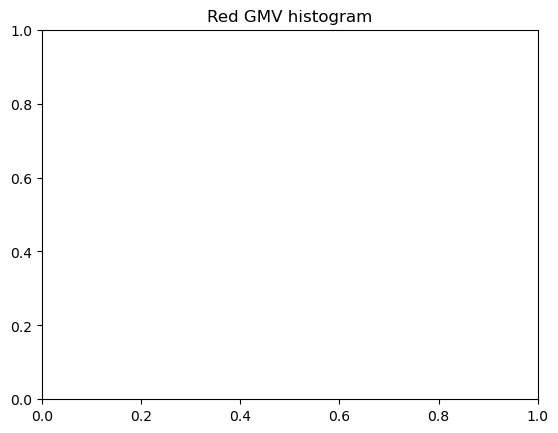

In [24]:
plt.subplots(nrows=4)
plt.grid()

plt.subplot(1,1,1)
plt.title('Red GMV histogram')
sns.histplot(data['red_gmv_total'], label='red', color='red')